In [1]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
from functions import calculate_infection, detection_plot, clean_deaths, clean_cases
from scipy.optimize import curve_fit

In [2]:
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
deaths_df = clean_deaths(deaths_df)

deaths_df_HR = deaths_df.iloc[103,:]
deaths_df_HR = deaths_df_HR.reset_index()

index_val = len(deaths_df_HR.index)

calculate_infection(deaths_df_HR, index_val)
deaths_df_HR = deaths_df_HR[0:-18]

index_val = len(deaths_df_HR.index)

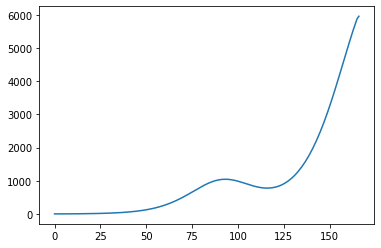

In [4]:
def logistic(x, midpoint=0, rate=.8, maximum=1):
    return maximum / (1 + np.exp(-rate * (x - midpoint)))

x = np.linspace(-6, 10, 1000)
y = logistic(x)# + logistic(x, midpoint=6, rate=2, maximum=5)



def double_log(x, x1, r1, m1, x2, r2, m2):
    return logistic(x, x1, r1, m1) + logistic(x, x2, r2, m2)


popt1, _ = curve_fit(logistic, range(0, index_val),  deaths_df_HR['total_infections'], p0=[0,0,0], maxfev = 5000)

popt2, _ = curve_fit(double_log, range(0, index_val), deaths_df_HR['total_infections'], p0=[0,0,0,0,0,0])

xmodel = np.linspace(0, index_val, index_val)
ymodel1 = logistic(xmodel, *popt1)

ymodel2 = double_log(xmodel, *popt2)

first_derivative = np.gradient(ymodel2)
second_derivative = np.gradient(first_derivative)

plt.plot(xmodel, first_derivative)